# RNA - Neurônio Perceptron

#### Alunos: 
* Daniel Benoliel Malcher - 1815080002
* Débora Moraes Pereira - 1815080080
* Lucas Migliorin Da Rosa - 1915080068
* Thiago Silva Jezini - 

# Bibliotecas

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split

# Abrindo dados

In [29]:
directory = os.getcwd()
print(directory)
path = directory + "/rna-data/dataAll.txt"

dados = np.fromfile(path)
dados = dados.reshape(-1,3)

print(f"Tamanho: {dados.shape}")


c:\Users\lmdre\OneDrive\Documentos\RNA-NeuronioPerceptron
Tamanho: (1000, 3)


# Iniciando pesos

In [43]:
w_Ini = []
for i in range(0,3):
    w_Ini.append(random.randrange(-5000,5000)/10000)

w_Ini = np.array(w_Ini)
print("Size: {}".format(w_Ini.size))
print('Pesos: {}'.format(w_Ini))

Size: 3
Pesos: [0.0491 0.4505 0.0185]


# Experimentação 1

In [44]:
limiar = 0

vies = -1

n = 0.1

def verificar_Valor(posi):
    x = np.array([vies,dados[posi][0],dados[posi][1]])
    resul = round(np.dot(x,w_Ini.T),4)
    return resul
    
def funcao(valor):
    if(valor >= limiar):
        return True
    else:
        return False

In [46]:
corrigi = True
i = 0
epocas = 0
while(corrigi):
    if(i >= dados.shape[0]):
        corrigi = False
    
    else:
        valor = verificar_Valor(i)
        preditor = funcao(valor)

        if(preditor == dados[i][-1]):
            i += 1
        else:
            epocas += 1
            x = np.array([vies,dados[i][0],dados[i][1]])
            w_Ini =  (w_Ini + (n*(dados[i][-1] - preditor)*x))
            i = 0

        
print('Finalizado\nÉpocas: {}\nPesos: {}'.format(epocas,w_Ini))

Finalizado
Épocas: 0
Pesos: [  -1.0509   465.31425 -463.36301]


# Plotando gráfico

In [52]:
color = []
x = []
y = []
for i in range(0,dados.shape[0]):
    x.append(dados[i][0])
    y.append(dados[i][1])
    if(dados[i][2] == 0):
        color.append('red')
    else:
        color.append('blue')

In [56]:
def fun_linear(x):
    return (w_Ini[0]/w_Ini[2]) - (((w_Ini[1]/w_Ini[2]))*x)

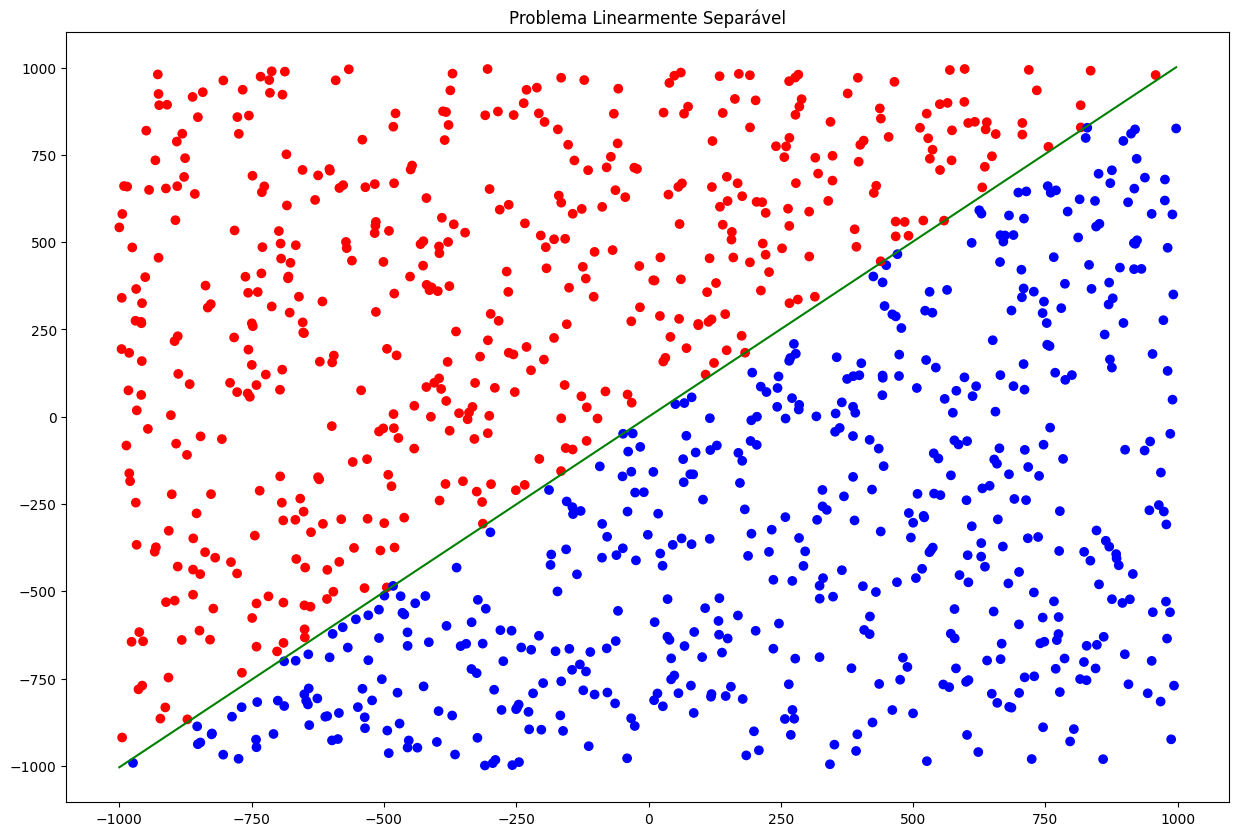

In [57]:
fig = plt.figure(figsize=(15,10))
plt.scatter(x,y,c=color)
plt.plot([min(x),max(x)],[fun_linear(min(x)),fun_linear(max(x))],color = 'green')
plt.title('Problema Linearmente Separável')
plt.savefig('./prob_li_sep.png')
plt.show()